In [1]:
import pandas as pd

In [2]:
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [3]:
from chembl_webresource_client.new_client import new_client

In [7]:
# data = new_client.target
# data_query = data.search('acetylcholinesterase')

# targets = pd.DataFrame.from_dict(data_query)
# targets.columns

In [4]:
data_new = new_client.activity
data1 = data_new.filter(target_chembl_id='CHEMBL233').filter(standard_type="IC50")

df = pd.DataFrame.from_dict(data1)
df.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

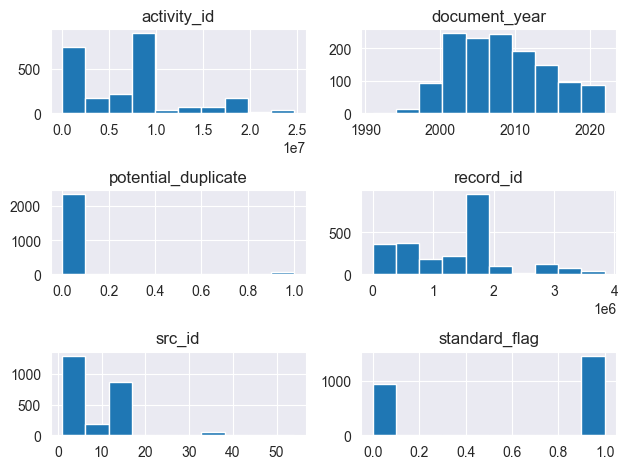

In [5]:
import matplotlib.pyplot as plt
df.hist()
plt.tight_layout()
plt.show()

C:\Users\tiant\AppData\Local\Temp\ipykernel_5300\2947026293.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap=cmap,center=0,annot=False,square=True)


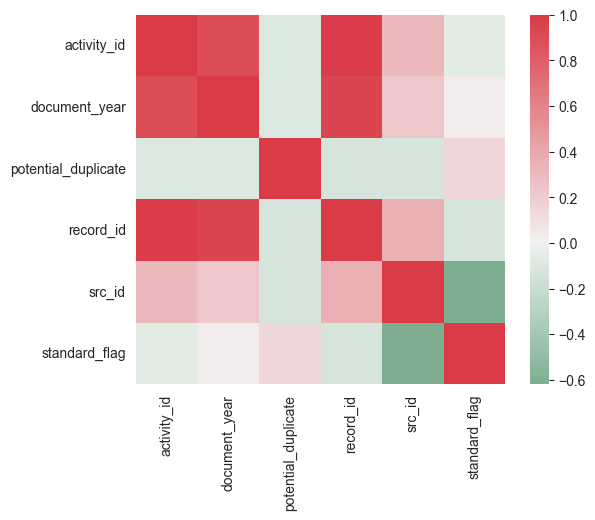

In [6]:
import seaborn as sns
cmap=sns.diverging_palette(500,10,as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap,center=0,annot=False,square=True)
plt.show()

C:\Users\tiant\AppData\Local\Temp\ipykernel_23908\1977641044.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap=cmap,center=0,annot=False,square=True)


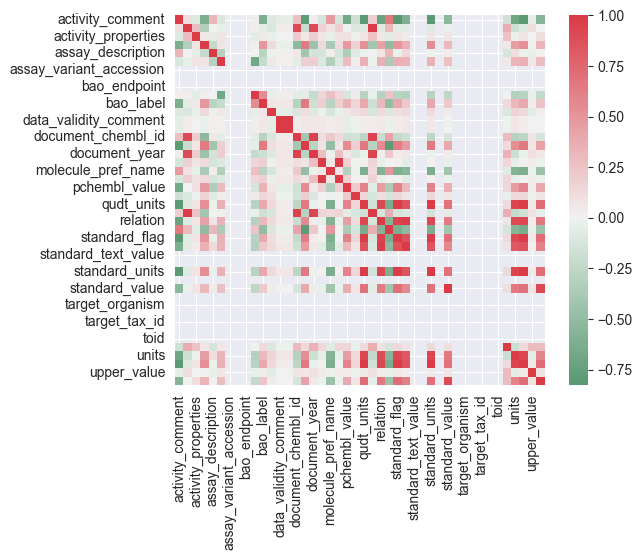

In [6]:
# def create_categorical(values):
#     if isinstance(values[0], list):
#         # Convert list to string and then create categorical variable
#         return pd.Categorical([str(x) for x in values])
#     else:
#         # Create categorical variable as usual
#         return pd.Categorical(values)
#
# for col in df.columns:
#     if df[col].dtype == 'object' and not isinstance(df[col].iloc[0], dict):
#         df[col] = create_categorical(df[col])
#         df[col] = df[col].cat.codes
#
# cmap=sns.diverging_palette(500,10,as_cmap=True)
# sns.heatmap(df.corr(),cmap=cmap,center=0,annot=False,square=True)
# plt.show()

In [7]:
print(df['standard_value'].unique())

['5250.0' '3480.0' '320.0' '4130.0' '10000.0' '8150.0' '3800.0' '1020.0'
 '3330.0' '2590.0' '3570.0' '5440.0' '2740.0' '3390.0' '6760.0' '817.0'
 '5980.0' '597.0' '1030.0' '2980.0' '1510.0' '3290.0' '5050.0' '8.2' None
 '4.0' '1.82' '2.0' '960.0' '1.5' '19.3' '147.0' '1050.0' '2.4' '235.0'
 '1.0' '1.3' '1470.0' '2890.0' '0.9' '2285.0' '24.9' '1.7' '735.0' '1.2'
 '4955.0' '315.0' '4.1' '2480.0' '16.0' '1235.0' '16.7' '520.0' '1730.0'
 '83.5' '6.3' '179.0' '4280.0' '780.0' '1200.0' '2680.0' '2200.0' '1680.0'
 '248.0' '1700.0' '1100.0' '950.0' '2064.0' '308.0' '2716.0' '1240.0'
 '4840.0' '3910.0' '3300.0' '1464.0' '43.0' '3460.0' '5000.0' '15000.0'
 '1800.0' '6900.0' '9500.0' '17000.0' '27000.0' '6000.0' '105.0' '500.0'
 '0.13' '8.0' '103.0' '764.0' '230.0' '120.0' '690.0' '1010.0' '1080.0'
 '200.0' '404.0' '220.0' '160.0' '1150.0' '611.0' '2000.0' '390.0' '53.0'
 '360.0' '7.0' '56.0' '44.0' '82.0' '0.57' '6.4' '59.0' '695.0' '650.0'
 '420.0' '130.0' '2050.0' '4.7' '8.3' '100.0' '610.0' '

In [8]:
#dropping records which donot have values in columns standard_value and canonical_smiles
df2 = df[df.standard_value.notna()]
df2 = df2[df2.canonical_smiles.notna()]

#dropping records with duplicate canonical_smiles values to keep them unique
df2_unique = df2.drop_duplicates(['canonical_smiles'])
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_unique[selection]

In [9]:
print(df['standard_value'].unique())

['5250.0' '3480.0' '320.0' '4130.0' '10000.0' '8150.0' '3800.0' '1020.0'
 '3330.0' '2590.0' '3570.0' '5440.0' '2740.0' '3390.0' '6760.0' '817.0'
 '5980.0' '597.0' '1030.0' '2980.0' '1510.0' '3290.0' '5050.0' '8.2' None
 '4.0' '1.82' '2.0' '960.0' '1.5' '19.3' '147.0' '1050.0' '2.4' '235.0'
 '1.0' '1.3' '1470.0' '2890.0' '0.9' '2285.0' '24.9' '1.7' '735.0' '1.2'
 '4955.0' '315.0' '4.1' '2480.0' '16.0' '1235.0' '16.7' '520.0' '1730.0'
 '83.5' '6.3' '179.0' '4280.0' '780.0' '1200.0' '2680.0' '2200.0' '1680.0'
 '248.0' '1700.0' '1100.0' '950.0' '2064.0' '308.0' '2716.0' '1240.0'
 '4840.0' '3910.0' '3300.0' '1464.0' '43.0' '3460.0' '5000.0' '15000.0'
 '1800.0' '6900.0' '9500.0' '17000.0' '27000.0' '6000.0' '105.0' '500.0'
 '0.13' '8.0' '103.0' '764.0' '230.0' '120.0' '690.0' '1010.0' '1080.0'
 '200.0' '404.0' '220.0' '160.0' '1150.0' '611.0' '2000.0' '390.0' '53.0'
 '360.0' '7.0' '56.0' '44.0' '82.0' '0.57' '6.4' '59.0' '695.0' '650.0'
 '420.0' '130.0' '2050.0' '4.7' '8.3' '100.0' '610.0' '

['intermediate' 'active' 'inactive']


<Axes: xlabel='bioactivity_threshold', ylabel='count'>

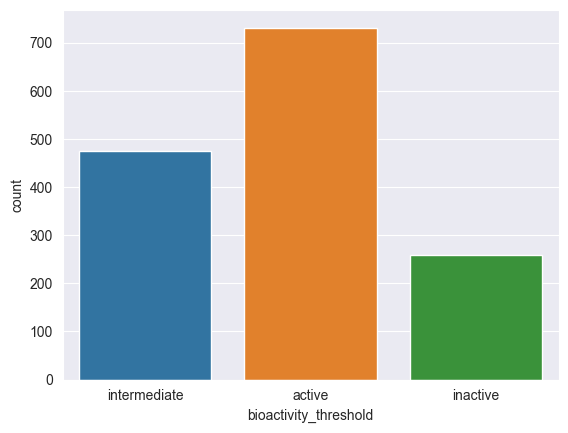

In [10]:
df2['bioactivity_threshold'] = df2['standard_value'].apply(lambda x: 'active' if float(x) < 1000 else ('inactive' if float(x)  > 10000 else 'intermediate'))
print(df2['bioactivity_threshold'].unique())
sns.countplot(x='bioactivity_threshold', data=df2)

In [11]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL423694,CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2cccc(OC)c2)cc1,5250.0
1,CHEMBL278078,CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccccc2OC)cc1,3480.0
2,CHEMBL13470,C=CCN1C[C@H](C)N([C@H](c2ccc(C(=O)N(CC)CC)cc2)...,320.0
3,CHEMBL127802,CCCCN1CCC(=C(c2ccccc2)c2ccc(C(=O)N(CC)CC)cc2)CC1,4130.0
4,CHEMBL126946,CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccc(F)cc2)cc1,10000.0


In [12]:
import numpy as np 
df3['plC50']= df3['standard_value'].apply(lambda x: np.log10(float(x)))

C:\Users\tiant\AppData\Local\Temp\ipykernel_5300\86708729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['plC50']= df3['standard_value'].apply(lambda x: np.log10(float(x)))


In [13]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value,plC50
0,CHEMBL423694,CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2cccc(OC)c2)cc1,5250.0,3.720159
1,CHEMBL278078,CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccccc2OC)cc1,3480.0,3.541579
2,CHEMBL13470,C=CCN1C[C@H](C)N([C@H](c2ccc(C(=O)N(CC)CC)cc2)...,320.0,2.505150
3,CHEMBL127802,CCCCN1CCC(=C(c2ccccc2)c2ccc(C(=O)N(CC)CC)cc2)CC1,4130.0,3.615950
4,CHEMBL126946,CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccc(F)cc2)cc1,10000.0,4.000000


In [22]:
!pip install RDKit

     ---------------------------------------- 20.5/20.5 MB 5.2 MB/s eta 0:00:00


In [14]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS

In [15]:
df3['canonical_smiles_mol']= df3['canonical_smiles'].apply(lambda x: AllChem.MolFromSmiles(x))

df3['canonical_smiles_fingerprints']= df3['canonical_smiles_mol'].apply(lambda x: Chem.RDKFingerprint(x))
# fps = [Chem.RDKFingerprint(x) for x in ms]

C:\Users\tiant\AppData\Local\Temp\ipykernel_5300\808546056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['canonical_smiles_mol']= df3['canonical_smiles'].apply(lambda x: AllChem.MolFromSmiles(x))
C:\Users\tiant\AppData\Local\Temp\ipykernel_5300\808546056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['canonical_smiles_fingerprints']= df3['canonical_smiles_mol'].apply(lambda x: Chem.RDKFingerprint(x))


In [16]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value,plC50,canonical_smiles_mol,canonical_smiles_fingerprints
0,CHEMBL423694,CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2cccc(OC)c2)cc1,5250.0,3.720159,<rdkit.Chem.rdchem.Mol object at 0x0000023F688...,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ..."
1,CHEMBL278078,CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccccc2OC)cc1,3480.0,3.541579,<rdkit.Chem.rdchem.Mol object at 0x0000023F688...,"[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, ..."
2,CHEMBL13470,C=CCN1C[C@H](C)N([C@H](c2ccc(C(=O)N(CC)CC)cc2)...,320.0,2.505150,<rdkit.Chem.rdchem.Mol object at 0x0000023F688...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ..."
3,CHEMBL127802,CCCCN1CCC(=C(c2ccccc2)c2ccc(C(=O)N(CC)CC)cc2)CC1,4130.0,3.615950,<rdkit.Chem.rdchem.Mol object at 0x0000023F688...,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ..."
4,CHEMBL126946,CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccc(F)cc2)cc1,10000.0,4.000000,<rdkit.Chem.rdchem.Mol object at 0x0000023F688...,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ..."


In [17]:
X= df3['canonical_smiles_fingerprints'].to_numpy()
y= df3['plC50'].to_numpy()

In [18]:
final_data= np.vstack((X, y))

In [19]:
final_data= final_data.T
final_data.shape

(1263, 2)

In [21]:
final_data= pd.DataFrame(final_data)

[[0 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 [0 1 0 ... 0 1 1]
 ...
 [1 1 0 ... 0 1 1]
 [1 0 0 ... 0 0 1]
 [1 1 1 ... 1 1 1]]


In [23]:
final_data.columns

(1263, 1)


In [24]:
final_data

[[0 1 0 ... 0 1 3.720159303405957]
 [1 1 0 ... 0 1 3.5415792439465807]
 [0 1 0 ... 1 1 2.505149978319906]
 ...
 [1 1 0 ... 1 1 4.477121254719663]
 [1 0 0 ... 0 1 4.079181246047625]
 [1 1 1 ... 1 1 1.0]]


In [28]:
print(len(final_data[0][0]))

In [29]:
arr = final_data[0]
temp = np.zeros((1263,2048),dtype=int)
for i in range(1263):
  for j in range(2048):
    temp[i,j] = int(arr[i][j])

print(temp)




,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,3.720159
1,1,1,0,0,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,1,3.541579
2,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,1,2.50515
3,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,3.61595
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,1,1,0,0,1,1,1,0,1,0,...,0,0,1,0,0,0,0,1,1,4.322219
1259,1,1,0,0,1,1,1,0,1,0,...,0,0,1,0,0,0,0,1,1,4.477121
1260,1,1,0,0,1,1,1,0,1,0,...,0,0,1,0,0,0,0,1,1,4.477121
1261,1,0,0,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,4.079181


In [46]:
print(len(temp))
print(len(final_data[1]))

1263
1263


In [30]:
cha = np.array(final_data[1]).reshape(1263,1)
print(cha.shape)

ModuleNotFoundError: No module named 'xgboost'

In [57]:
input = np.concatenate((temp,cha), axis =1)
print(input)

[[0 1 0 ... 0 1 3.720159303405957]
 [1 1 0 ... 0 1 3.5415792439465807]
 [0 1 0 ... 1 1 2.505149978319906]
 ...
 [1 1 0 ... 1 1 4.477121254719663]
 [1 0 0 ... 0 1 4.079181246047625]
 [1 1 1 ... 1 1 1.0]]


In [ ]:
# import xgboost as xg
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error as MSE

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)

# xgb_r.fit(X_train, Y_train)
# Y_pred = xgb_r.predict(X_test)

In [138]:
import pandas as pd
import numpy as np
import xgboost as xg
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import random

In [113]:
def ActiveLearn(model, X_training, y_training, X_test, y_test, n_initial, n_queries, querystrat, n_batch): 
  # random.seed()
  # df = df.sample(frac = 1)
  # #split data into X and y 
  # X = df.iloc[0]
  # y = df.iloc[1]

  # X = X.to_numpy()[:, (0,1)]
  # y = y.to_numpy()

  # # get the indicies of the first n observations that were randomly chosen
  # index_initial = np.random.choice(range(len(X)), size=n_initial, replace=False)
  # # save the remaining data points to be sampled from later 
  # remaining = [i for i in range(len(X)) if i not in index_initial]

  # # assign the data points to the training and test arrays 
  # X_training = X[index_initial]
  # y_training= y[index_initial]
  # X_test= X[remaining]
  # y_test = y[remaining]

  #model= xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)

  scores=[]

  model.fit(X_training, y_training)

  initial_model_error= cross_val_score(model, X_training, y_training, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
  scores.append(np.abs(initial_model_error))

  unobserved_error=[]
  
  # randomly sample each of the n query points, remove the point from the remianing test data, predict the model performace, then teach it again
  for i in range(int((n_queries-n_initial)/n_batch)):
      
      # query by committee method 
      if querystrat=="random":
        model.fit(X_training, y_training)

        # randomly sample the next 3 points to be added
        indices = np.random.choice(range(len(X_test)), size=3, replace=False)
        queries = [(X_test[i], y_test[i]) for i in indices]

        y_pred = model.predict(X_test)
        scores.append(mean_squared_error(y_test, y_pred))

        model.fit(X_training, y_training)

        # add the points to the training data 
        X_training = np.append(X_training, [X_test[i] for i in indices], axis=0)
        y_training = np.append(y_training, [y_test[i] for i in indices], axis=0)

        # remove the data points we used in training from the remaining test data 
        X_test = np.delete(X_test, indices, 0)  
        y_test = np.delete(y_test, indices, 0)

      # diversity based sampling method 
      elif querystrat== "Diversity Based Sampling": 
        model.fit(X_training, y_training)

        # Fit k-means clustering model to the remaining unobserved test data
        kmeans = KMeans(n_clusters=n_batch).fit(X_test)

        # Get the indices of the centroid closest to each cluster 
        indices = []
        for i in range(n_batch):
          centroid_distances = np.linalg.norm(X_test - kmeans.cluster_centers_[i], axis=1)
          indices.append(np.argmin(centroid_distances))
        
        # Get the indices of the centroid closest to each cluster / random from each cluster
        # indices = []
        # for i in range(n_batch):
        #   cluster_indices = np.where(kmeans.labels_ == i)[0]
        #   random_index = np.random.choice(cluster_indices)
        #   indices.append(random_index)

        queries = [(X_test[i], y_test[i]) for i in indices]

        y_pred = model.predict(X_test)
        scores.append(mean_squared_error(y_test, y_pred))

        model.fit(X_training, y_training)

        # add the points to the training data 
        X_training = np.append(X_training, [X_test[i] for i in indices], axis=0)
        y_training = np.append(y_training, [y_test[i] for i in indices], axis=0)

        # remove the data points we used in training from the remaining test data 
        X_test = np.delete(X_test, indices, 0)  
        y_test = np.delete(y_test, indices, 0)

  y_pred = model.predict(X_test)
  print("last acc score: ", mean_squared_error(y_test, y_pred))
  scores.append(mean_squared_error(y_test, y_pred))
  
  print(scores)
  print("LEN", len(scores))
  return scores

In [154]:
def Simulate(df, n_rounds, n_initial, n_queries):

  total_random=[]
  total_diversity=[]

  for i in range(n_rounds):
    random.seed(i)
    # df= np.concatenate((X, y[:, np.newaxis]), axis=1)
    X = df.iloc[:,0]
    y = df.iloc[:,0]
    X = X.to_numpy()
    y = y.to_numpy()

    # get the indicies of the first n observations that were randomly chosen
    index_initial = np.random.choice(range(len(X)), size=n_initial, replace=False)
    # save the remaining data points to be sampled from later 
    remaining = [i for i in range(len(X)) if i not in index_initial]

    # assign the data points to the training and test arrays 
    X_training = X[index_initial]
    print(X_training)
    y_training= y[index_initial]
    X_test= X[remaining]
    y_test = y[remaining]

    # choose base learner- random forest or svm 
    # model= SVR()
    model= xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
    # model= svm.SVC(probability=True)
    model.fit(X_training, y_training)

    acc_random = ActiveLearn(model, X_training, y_training, X_test, y_test, n_initial, n_queries, "random", 3)
    total_random.append(acc_random)

    acc_diversity = ActiveLearn(model, X_training, y_training, X_test, y_test, n_initial, n_queries, "Diversity Based Sampling", 3)
    total_diversity.append(acc_diversity)

  return total_random, total_diversity

In [155]:
total_random, total_diversity= Simulate(final_data, 1, 10, 1200)

[list([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 

ValueError: ignored